# Test Views

In [1]:
import requests
import json
import os
import shutil
if os.path.exists('tmp'):
    shutil.rmtree('tmp')
os.makedirs('tmp')

import matplotlib.pyplot as plt
%matplotlib inline

def download_file(url, dl_path, method='GET', data=None):
    if method == 'GET':
        r = requests.get(url, stream=True)
    elif method == 'POST':
        r = requests.post(url, data=data, stream=True)
    else:
        raise Exception('"{}" method not implemented'.format(method))
        
    if r.status_code != 200:
        raise Exception("HTTP Code: {}".format(r.status_code))

    with open(dl_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)

    return r.status_code

### get frame

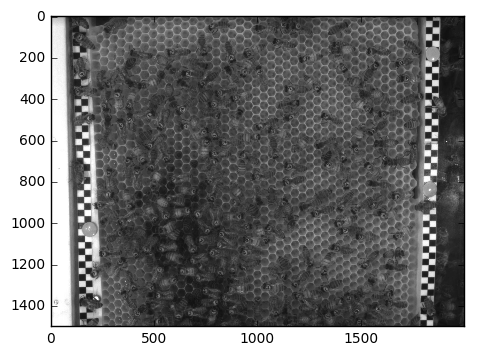

In [2]:
frame_id = 13864261080218724867
dlpath = 'tmp/frame.jpg'
r = download_file('http://127.0.0.1:6000/plotter/get_frame/', dlpath, data={'frame_id': frame_id}, method='POST')
plt.imshow(plt.imread(dlpath))

### get video

In [3]:
frame_ids = [13864261080218724867, 10339405566141145726, 14570103810368523203, 11179714366483799180, 15643601068528240023, 10017248652083986944, 11034648466767945867, 16960778411273128596, 9487705301727582204, 9588704384551476885, 12421239933683009862, 13600004377698770656, 9646598296546965144, 18380450435065834589, 11496078223417305341, 17649202003269774393, 14214398429912454003, 13660810399167544366, 10440267738279795311, 16287485703357889641]
dlpath = 'tmp/video.mp4'
r = download_file('http://127.0.0.1:6000/plotter/get_video/', dlpath, data={'frame_ids': json.dumps(frame_ids)}, method='POST')

from IPython.display import HTML
VIDEO_HTML = """
<video style='margin: 0 auto;' width="{width}" height="{height}" controls>
    <source src="{src}" type="video/mp4">
</video>
"""
HTML(VIDEO_HTML.format(
        src=dlpath,
        width=4000/6,
        height=3000/6
    ))

### plot frame

In [4]:
with open('plot_frame_data.json', 'r') as f:
    beedata_frame = f.read()

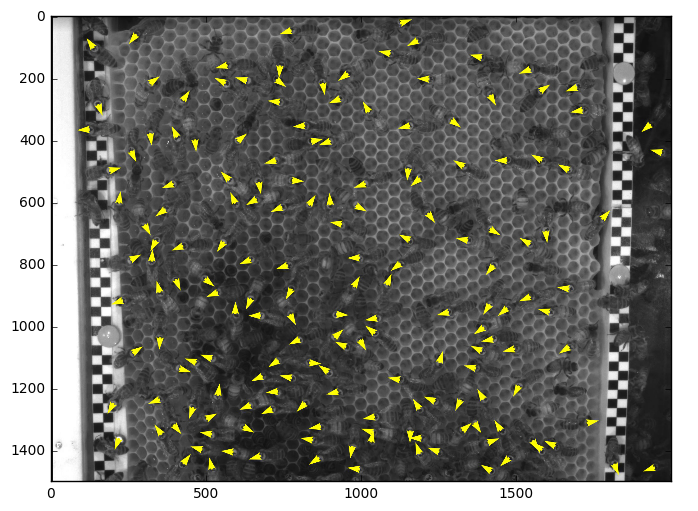

In [5]:
dlpath = 'tmp/plot_frame.jpg'
r = download_file('http://127.0.0.1:6000/plotter/plot_frame/', 
                  dlpath, 
                  data={'data': beedata_frame}, 
                  method='POST')
plt.figure(figsize=(8,6))
plt.imshow(plt.imread(dlpath))

### plot video

In [6]:
with open('plot_video_data.json', 'r') as f:
    data = f.read()

dlpath = 'tmp/video_plot.mp4'
r = download_file('http://127.0.0.1:6000/plotter/plot_video/', dlpath, data={'data': data}, method='POST')

from IPython.display import HTML
VIDEO_HTML = """
<video style='margin: 0 auto;' width="{width}" height="{height}" controls>
    <source src="{src}" type="video/mp4">
</video>
"""
HTML(VIDEO_HTML.format(
        src=dlpath,
        width=4000/6,
        height=3000/6
    ))

### cleanup

In [7]:
shutil.rmtree('tmp')